In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 331s 2us/step


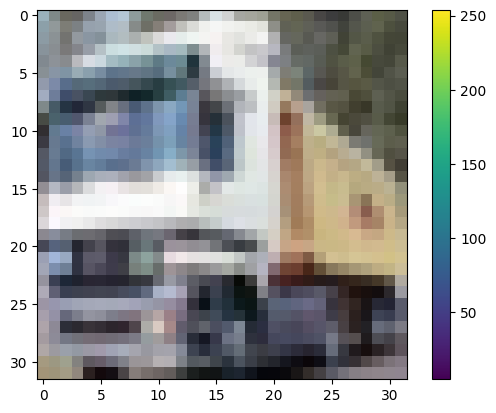

In [3]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
model = Sequential()
model.add(Conv2D(64, activation = 'relu', kernel_size = (3,3 )))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, activation = 'relu', kernel_size = (3,3)))
model.add(Flatten(input_shape = (32,32,3)))
model.add(Dense(80, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

c:\Users\park\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, verbose=1, validation_split=0.3)

Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.3742 - loss: 1.7224 - val_accuracy: 0.5629 - val_loss: 1.2517
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.5747 - loss: 1.2058 - val_accuracy: 0.5918 - val_loss: 1.1640
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.6330 - loss: 1.0421 - val_accuracy: 0.6171 - val_loss: 1.0845
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.6765 - loss: 0.9255 - val_accuracy: 0.6439 - val_loss: 1.0332
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.7125 - loss: 0.8153 - val_accuracy: 0.6295 - val_loss: 1.0891
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.7409 - loss: 0.7375 - val_accuracy: 0.6330 - val_loss: 1.0736
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.7744 - loss: 0.6539 - val_accuracy: 0.6462 - val_loss: 1.0688
Epoch 8/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.7921 -

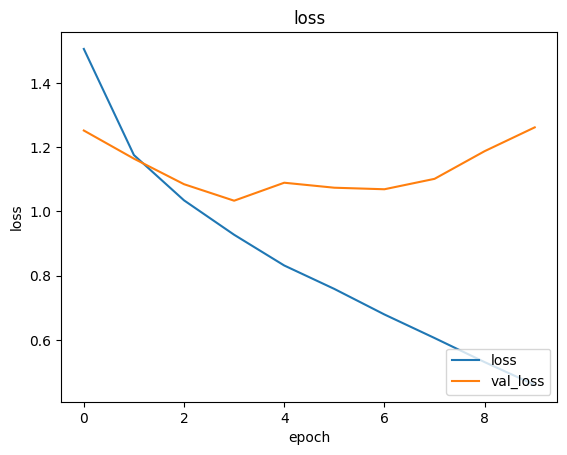

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc = 'lower right')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
정답= [3]
예측값= [3.7574605e-06 8.1581544e-07 1.4089060e-05 9.8799407e-01 1.5469875e-04
 2.2560207e-03 8.8956477e-03 3.8234152e-06 6.7669194e-04 5.3407717e-07]


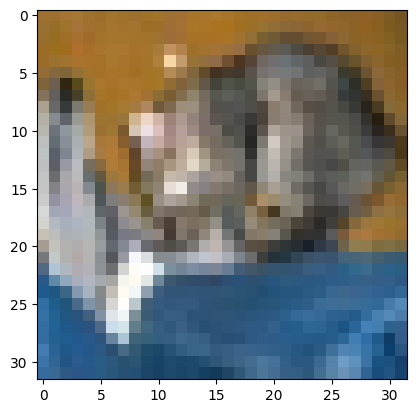

In [8]:
plt.figure()
plt.imshow(X_test[0])
y_pred = model.predict(X_test)
print("정답=", y_test[0])
print("예측값=", y_pred[0])

In [10]:
from matplotlib.image import imread
from matplotlib import pyplot

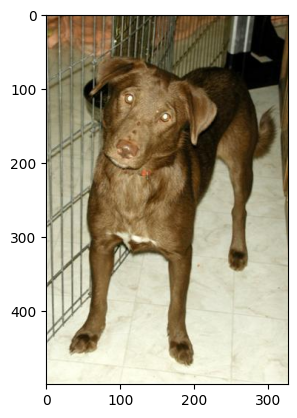

In [17]:
image = imread('PetImages/train/dog/1.jpg')
pyplot.imshow(image)
pyplot.show()

In [22]:
train_dir = 'PetImages/train'
test_dir = 'PetImages/test'

model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units=512, activation = 'relu'))
model.add(Dense(units=1, activation = 'sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale= 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=20,
    class_mode = 'binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=20,
    class_mode = 'binary'
)

Found 4000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [26]:
history = model.fit(
    train_generator, steps_per_epoch = 100, epochs=10,
    validation_data=test_generator, validation_steps=5
)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000022FF92A3740>

In [27]:
test_input = np.random.random((128,32))
test_target = np.random.random((128,1))

inputs = tf.keras.Input(shape=(32,))
outputs = tf.keras.layers.Dense(1)(inputs)
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer='adam', loss="mean_squared_error")

model.fit(test_input, test_target, epochs=3)

model.save("my_model.keras")
saved_model = tf.keras.models.load_model("my_model.keras")
saved_model.fit(test_input, test_target, epochs=3)

Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2345 
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2139
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2090
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1979
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1818
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2059


In [28]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = 'dog.jpg'
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

pred = model.predict(x)
print('예측:', decode_predictions(pred,top=3)[0])

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
예측: [('n02093428', 'American_Staffordshire_terrier', 0.36957893), ('n02093256', 'Staffordshire_bullterrier', 0.32046583), ('n02099712', 'Labrador_retriever', 0.19661535)]
